In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
df_ = pd.read_csv('application_train.csv')

In [3]:
df = df_.copy()

In [4]:
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

terdapat 122 column dengan jumlah data sebesar 307511
column target merupakan column yang menjelaskan jika custmer memiliki kesulitan untuk membayar lebih dari X hari setidaknya satu cicilan Y pertama. yang diberikan angka 1 = memiliki kesulitan untuk membayar dan 0 = tidak memiliki kesulitan membayar

# EDA

In [5]:
pd.set_option('display.max_rows', None)  # Set max_rows to None to display all rows
pd.set_option('display.max_columns', None)

## Descriptive Statistics

In [6]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
kategorik = df.select_dtypes(include=['object'])
numerik = df.select_dtypes(include=['int64','float64'])

In [8]:
kategorik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          307511 non-null  object
 1   CODE_GENDER                 307511 non-null  object
 2   FLAG_OWN_CAR                307511 non-null  object
 3   FLAG_OWN_REALTY             307511 non-null  object
 4   NAME_TYPE_SUITE             306219 non-null  object
 5   NAME_INCOME_TYPE            307511 non-null  object
 6   NAME_EDUCATION_TYPE         307511 non-null  object
 7   NAME_FAMILY_STATUS          307511 non-null  object
 8   NAME_HOUSING_TYPE           307511 non-null  object
 9   OCCUPATION_TYPE             211120 non-null  object
 10  WEEKDAY_APPR_PROCESS_START  307511 non-null  object
 11  ORGANIZATION_TYPE           307511 non-null  object
 12  FONDKAPREMONT_MODE          97216 non-null   object
 13  HOUSETYPE_MODE              1

In [9]:
numerik.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 106 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    CNT_CHILDREN                  int64  
 3    AMT_INCOME_TOTAL              float64
 4    AMT_CREDIT                    float64
 5    AMT_ANNUITY                   float64
 6    AMT_GOODS_PRICE               float64
 7    REGION_POPULATION_RELATIVE    float64
 8    DAYS_BIRTH                    int64  
 9    DAYS_EMPLOYED                 int64  
 10   DAYS_REGISTRATION             float64
 11   DAYS_ID_PUBLISH               int64  
 12   OWN_CAR_AGE                   float64
 13   FLAG_MOBIL                    int64  
 14   FLAG_EMP_PHONE                int64  
 15   FLAG_WORK_PHONE               int64  
 16   FLAG_CONT_MOBILE              int64  
 17   FLAG_PHONE                    int64  
 18   FL

In [10]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [11]:
categoricals = kategorik.columns
cat_desc = df[categoricals].describe()

cat_desc

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

## Univariate Analysis

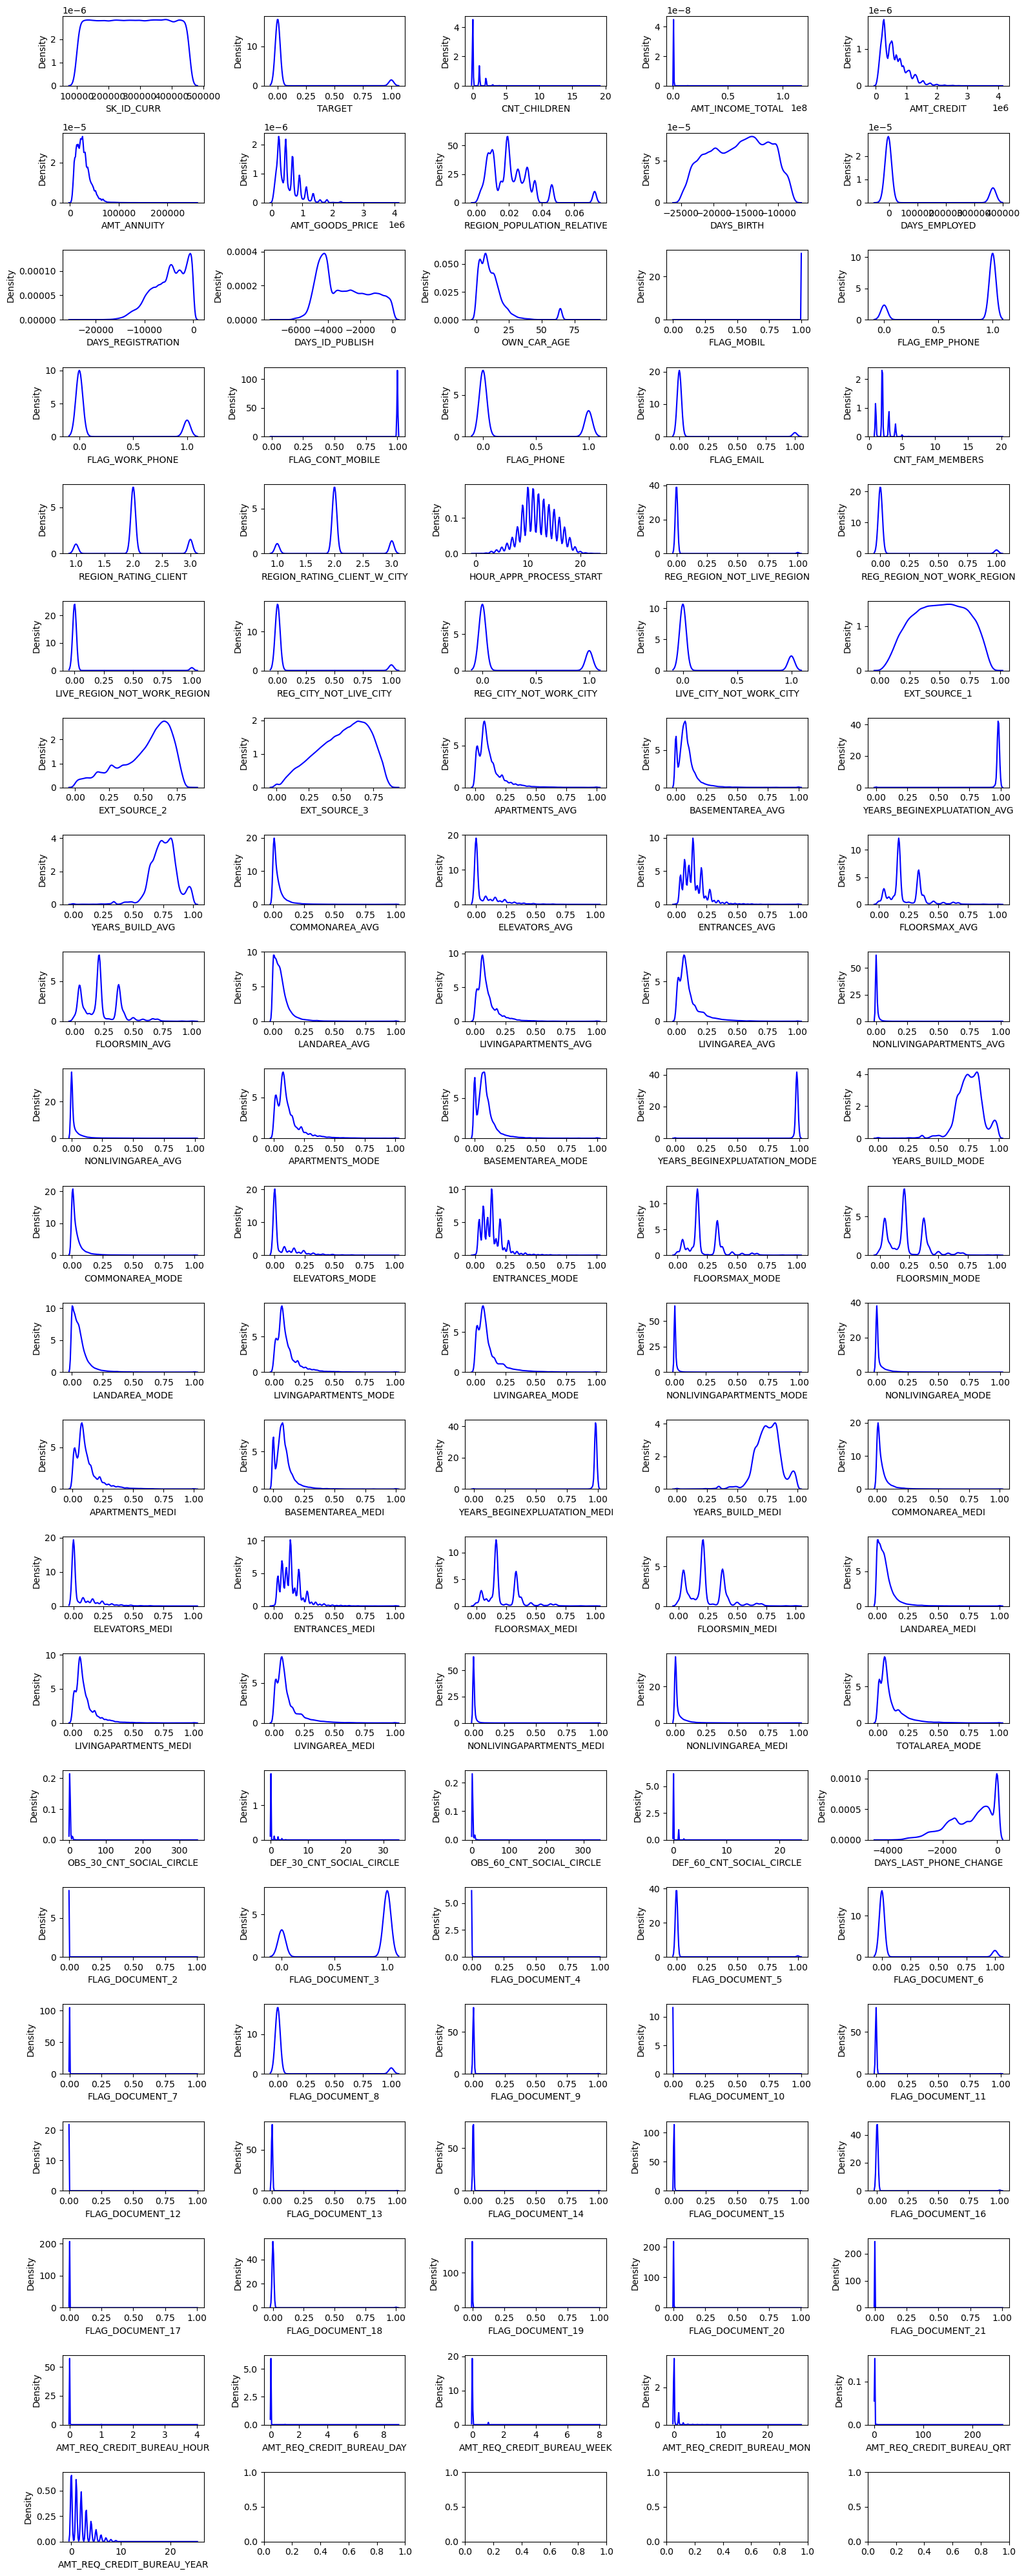

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
fig, axes = plt.subplots(22, 5, figsize=(16, 40))  # Adjust the figsize as per your preference

for i, ax in enumerate(axes.flat):
    if i < len(features):
        sns.kdeplot(x=df[features[i]], color='blue', ax=ax)
        ax.set_xlabel(features[i])

plt.tight_layout()
plt.show()


In [13]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [14]:
total_records = df['TARGET'].count()
percentage_counts = df['TARGET'].value_counts() / total_records * 100
print(percentage_counts)


0    91.927118
1     8.072882
Name: TARGET, dtype: float64


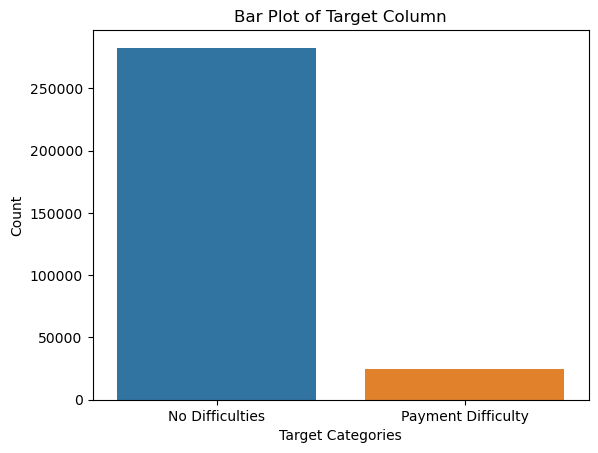

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "df" is your DataFrame and "TARGET" is the column name
target_values = df['TARGET']

# Count the occurrences of payment difficulty (1) and other difficulties (0)
target_counts = target_values.value_counts()

# Create the bar plot
sns.barplot(x=['No Difficulties', 'Payment Difficulty'], y=target_counts.values)

# Set the labels and title
plt.xlabel('Target Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Target Column')

# Display the bar plot
plt.show()


terdapat 8% atau sebesar 24825 client memiliki kesulitan untuk membayar dan 92% atau sebesar 282686 yang tidak memiliki kesulitan membayar. data TARGET memiliki imbalance sehingga nantinya akan dilakukan resampling

In [16]:
col_kategorik = kategorik.columns
for i in col_kategorik:
    df_i = kategorik[i]
    print('Distribusi variabel {} adalah:\n{}'.format(i, df_i.value_counts()))
    print('')

Distribusi variabel NAME_CONTRACT_TYPE adalah:
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

Distribusi variabel CODE_GENDER adalah:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Distribusi variabel FLAG_OWN_CAR adalah:
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Distribusi variabel FLAG_OWN_REALTY adalah:
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Distribusi variabel NAME_TYPE_SUITE adalah:
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Distribusi variabel NAME_INCOME_TYPE adalah:
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave  

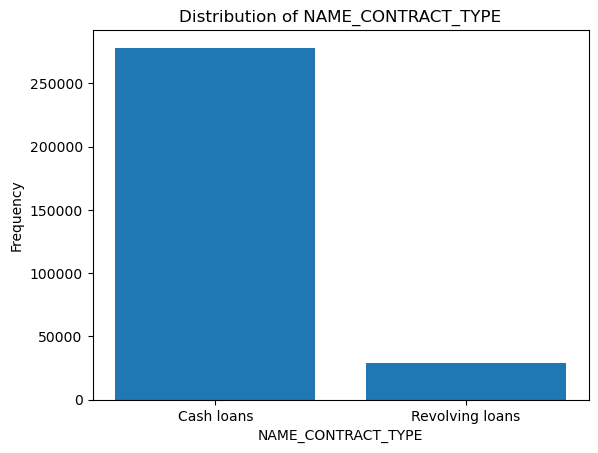

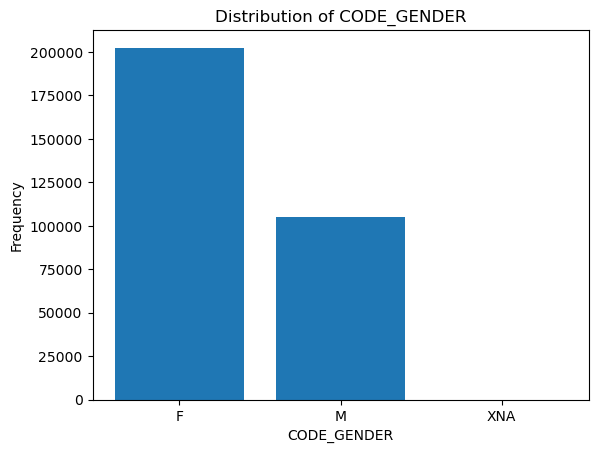

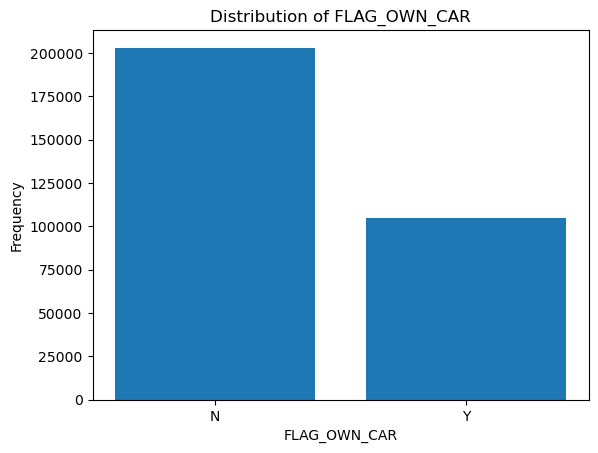

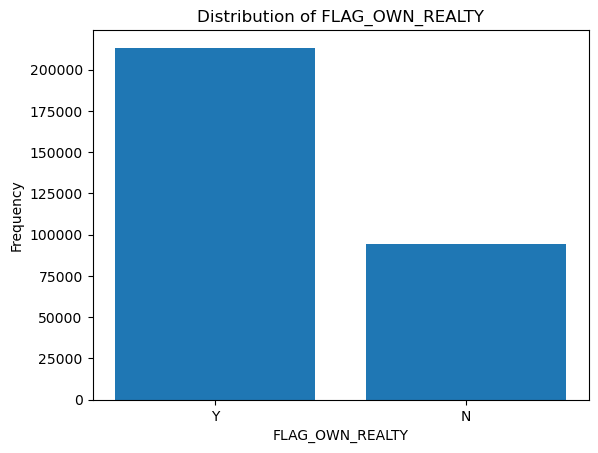

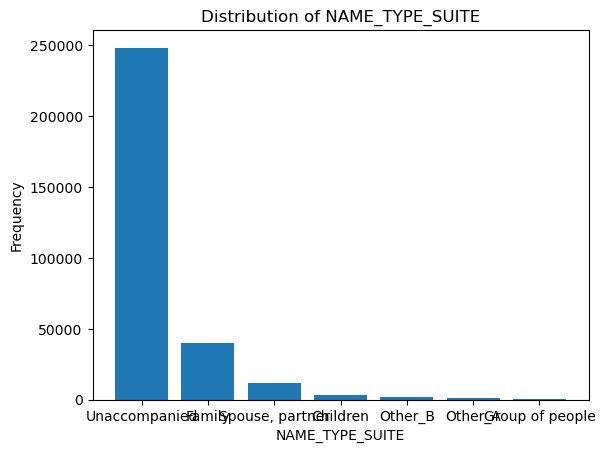

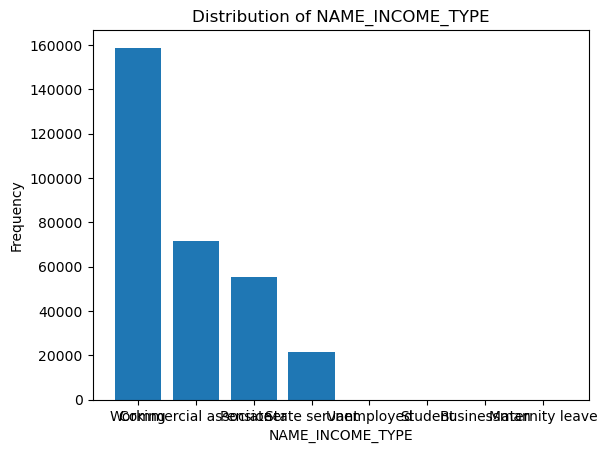

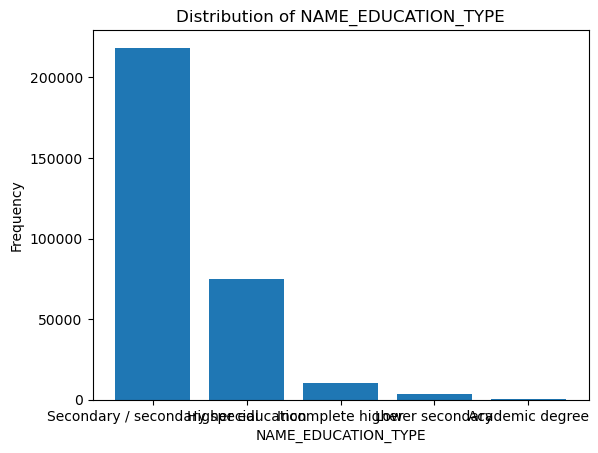

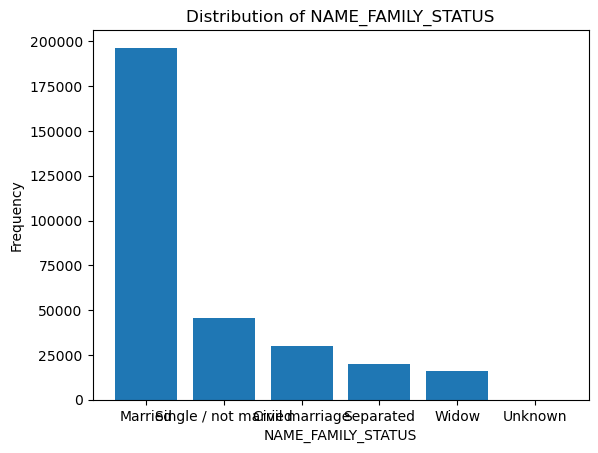

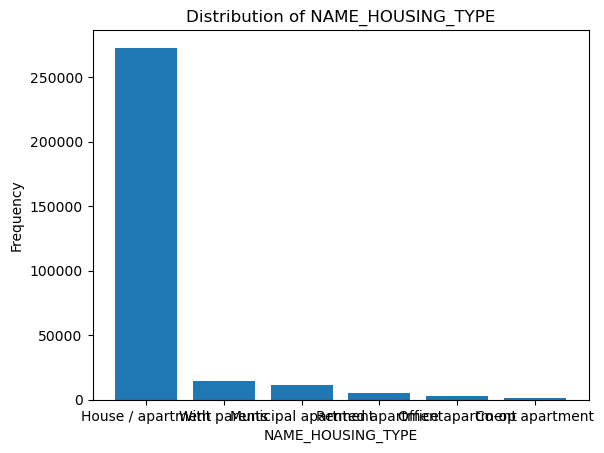

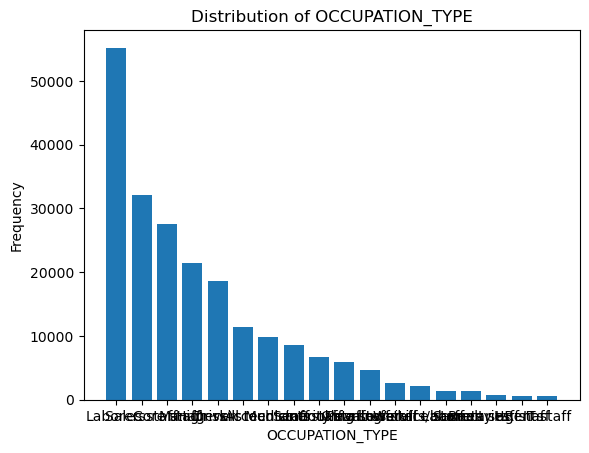

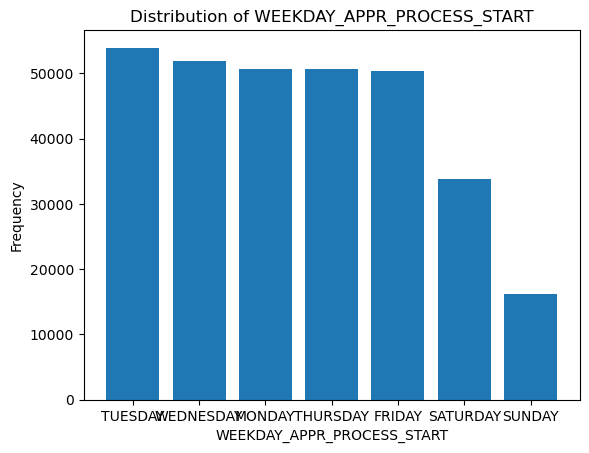

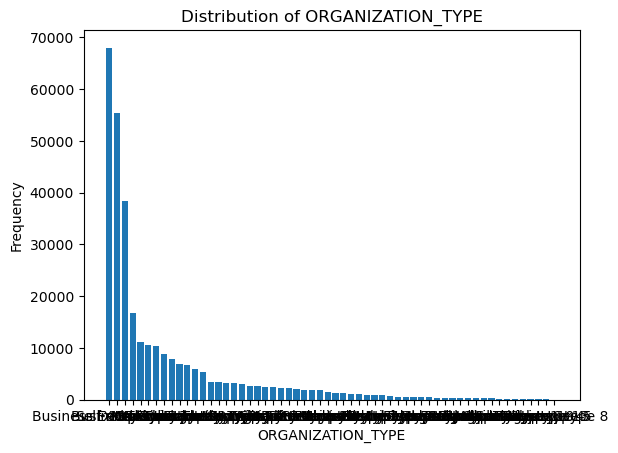

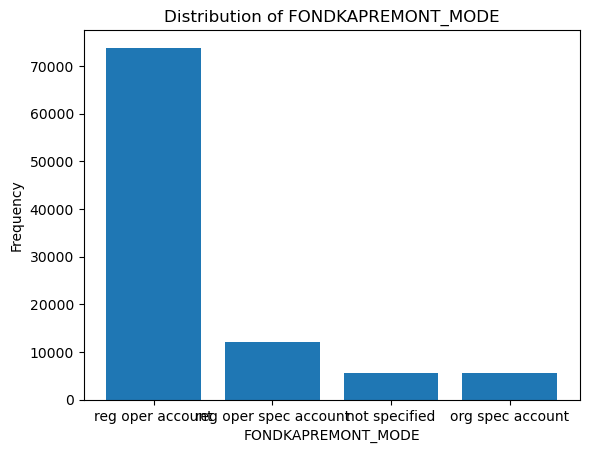

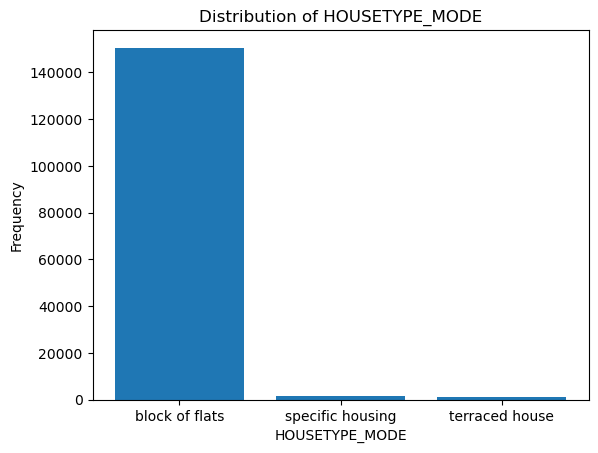

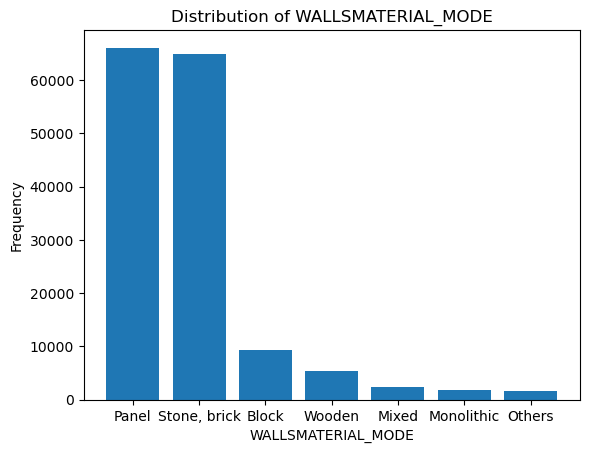

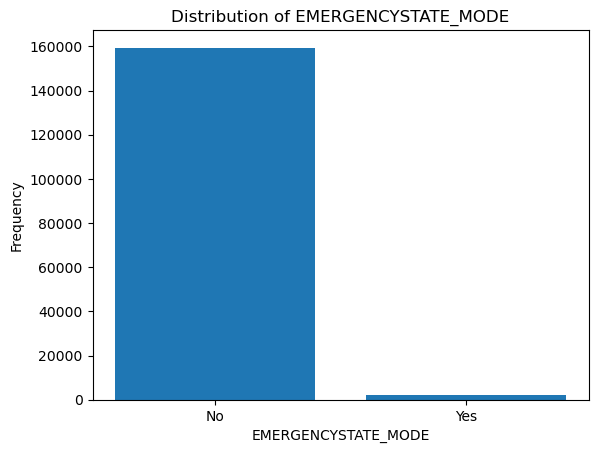

In [17]:
import matplotlib.pyplot as plt

col_kategorik = kategorik.columns

for i in col_kategorik:
    df_i = kategorik[i]
    value_counts = df_i.value_counts()

    plt.figure()
    plt.bar(value_counts.index, value_counts.values)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title('Distribution of {}'.format(i))
    plt.show()


## 

## Multivariate Analysis

<AxesSubplot:>

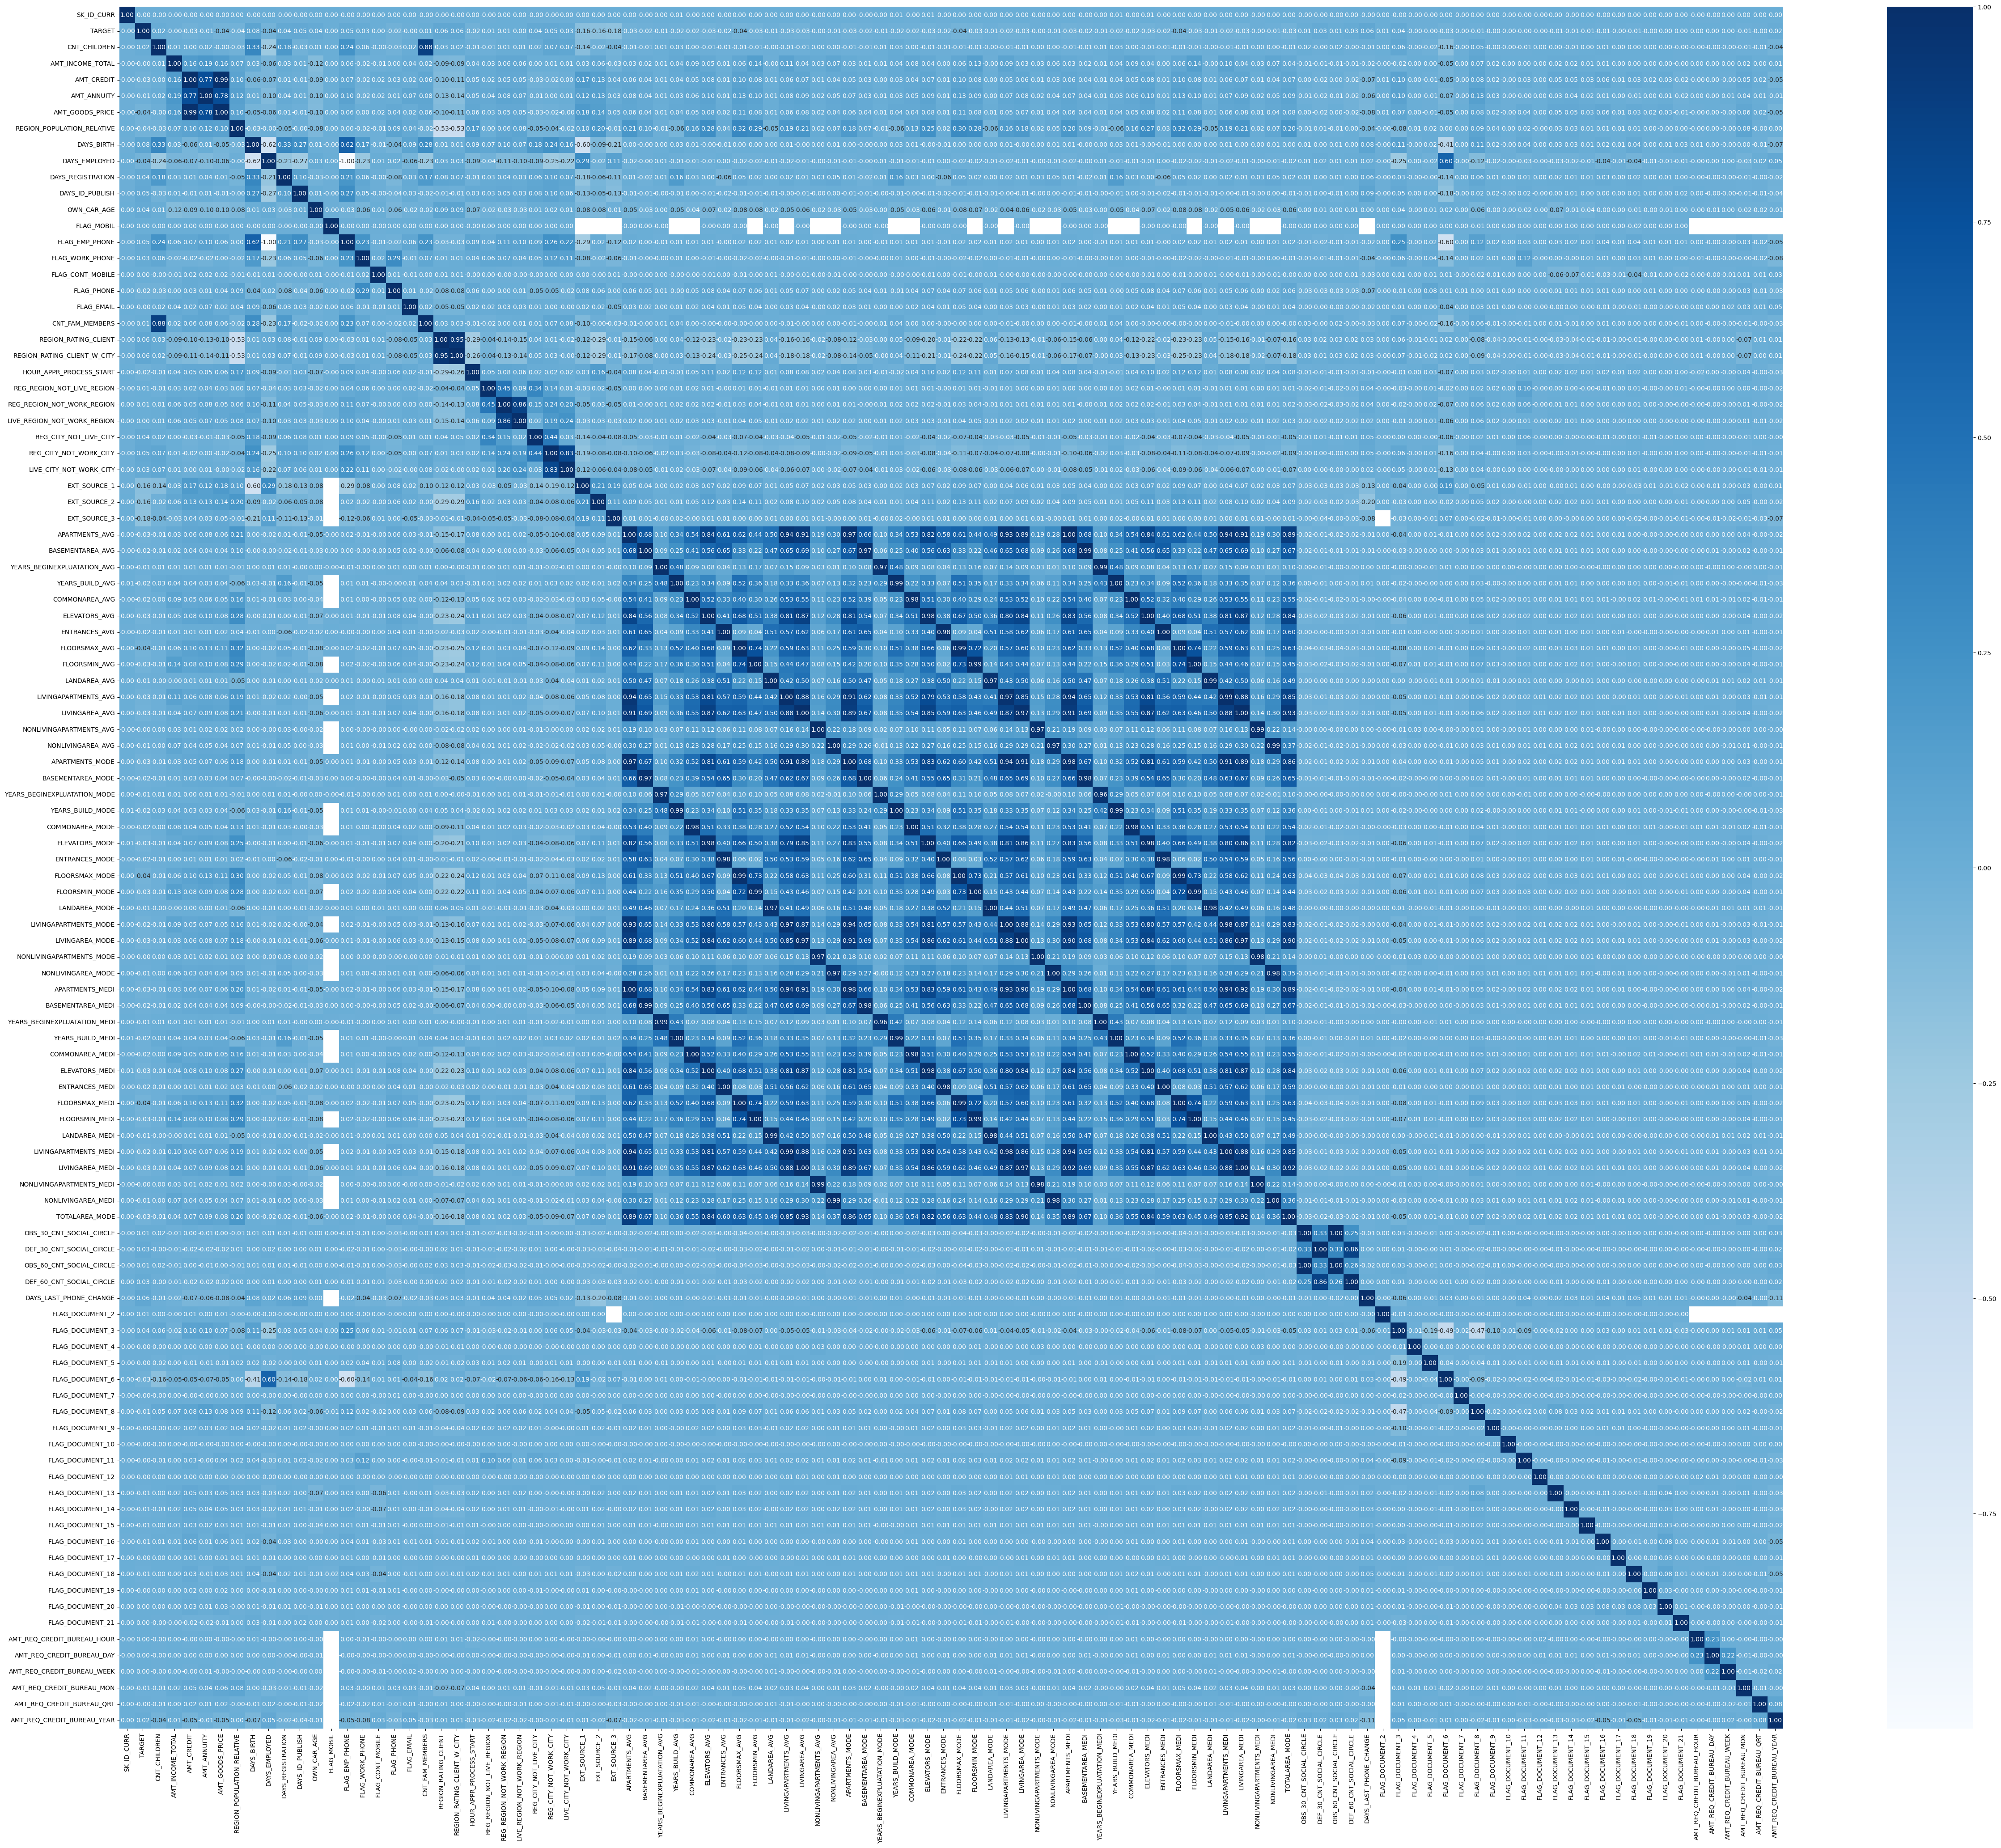

In [18]:
plt.figure(figsize=(60, 50 ))

# Adjust margins
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

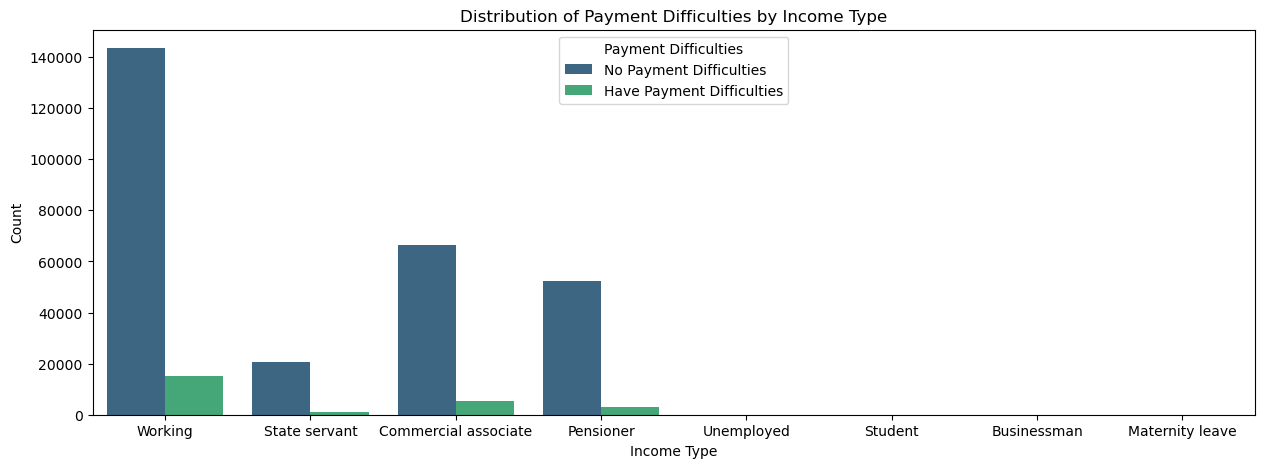

In [19]:
plt.figure(figsize=(15, 5))
sns.countplot(x='NAME_INCOME_TYPE', hue='TARGET', palette='viridis', data=df)
plt.title("Distribution of Payment Difficulties by Income Type")
plt.xlabel("Income Type")
plt.ylabel("Count")
plt.legend(title="Payment Difficulties", labels=["No Payment Difficulties", "Have Payment Difficulties"])
plt.show()


terlihat bahwa client yang paling banyak meminjam berasal dari kalangan tipe pekerja dan mayoritas dari mereka tidak memiliki kesulitan untuk membayar.

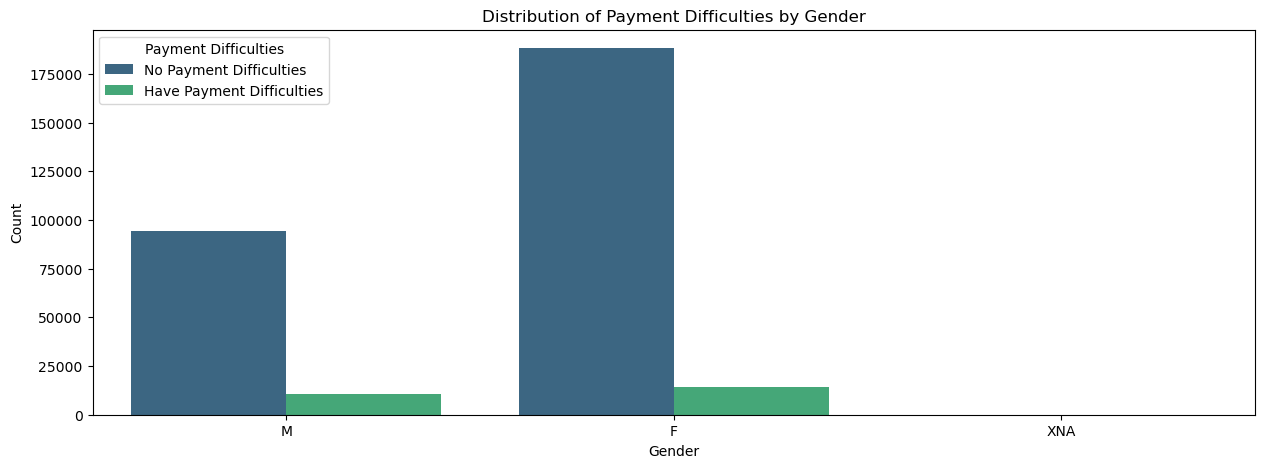

In [20]:
plt.figure(figsize=(15, 5))
sns.countplot(x='CODE_GENDER', hue='TARGET', palette='viridis', data=df)
plt.title("Distribution of Payment Difficulties by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Payment Difficulties", labels=["No Payment Difficulties", "Have Payment Difficulties"])
plt.show()


terlihat bahwa perempuan merupakan jenis kelamin yang dimiliki oleh client dan mayoritas dari mereka tidak memiliki kesulitan untuk membayar.

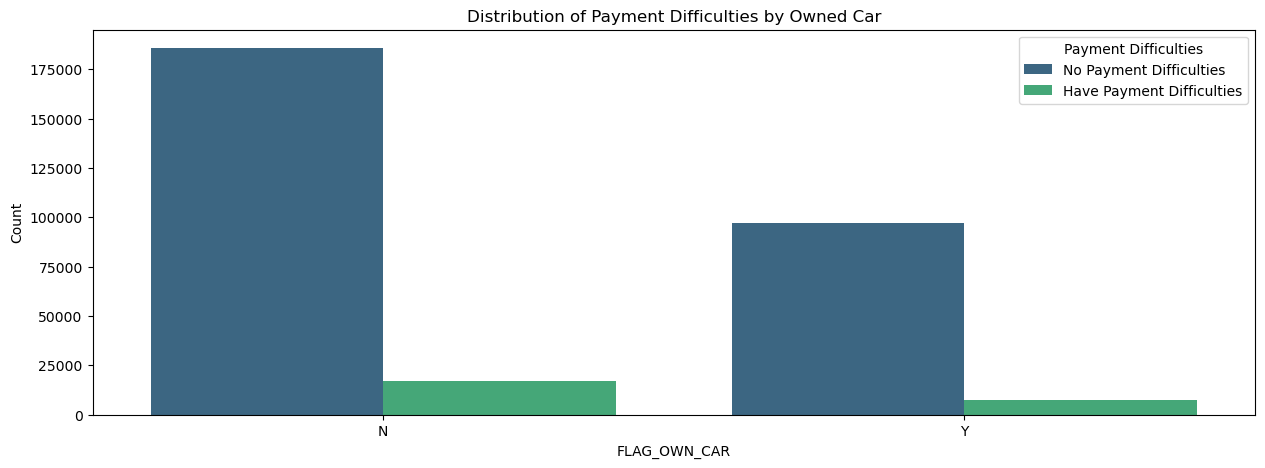

In [21]:
plt.figure(figsize=(15, 5))
sns.countplot(x='FLAG_OWN_CAR', hue='TARGET', palette='viridis', data=df)
plt.title("Distribution of Payment Difficulties by Owned Car")
plt.xlabel("FLAG_OWN_CAR")
plt.ylabel("Count")
plt.legend(title="Payment Difficulties", labels=["No Payment Difficulties", "Have Payment Difficulties"])
plt.show()


mayoritas dari client yang meminjam tidak memiliki mobil dibandingkan dengan memiliki mobil

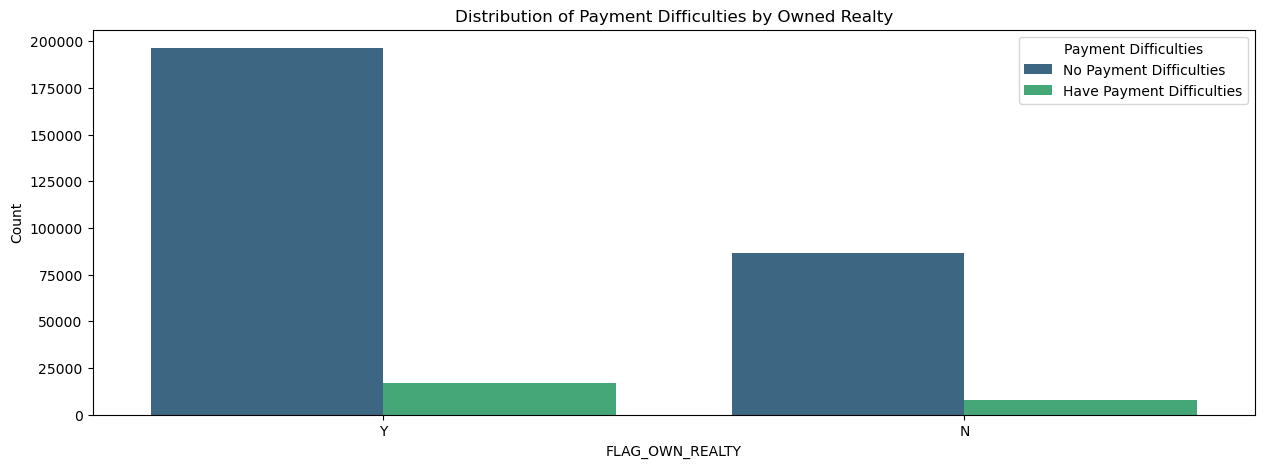

In [22]:
plt.figure(figsize=(15, 5))
sns.countplot(x='FLAG_OWN_REALTY', hue='TARGET', palette='viridis', data=df)
plt.title("Distribution of Payment Difficulties by Owned Realty")
plt.xlabel("FLAG_OWN_REALTY")
plt.ylabel("Count")
plt.legend(title="Payment Difficulties", labels=["No Payment Difficulties", "Have Payment Difficulties"])
plt.show()

mayoritas dari client yang meminjam memiliki rumah atau flat.

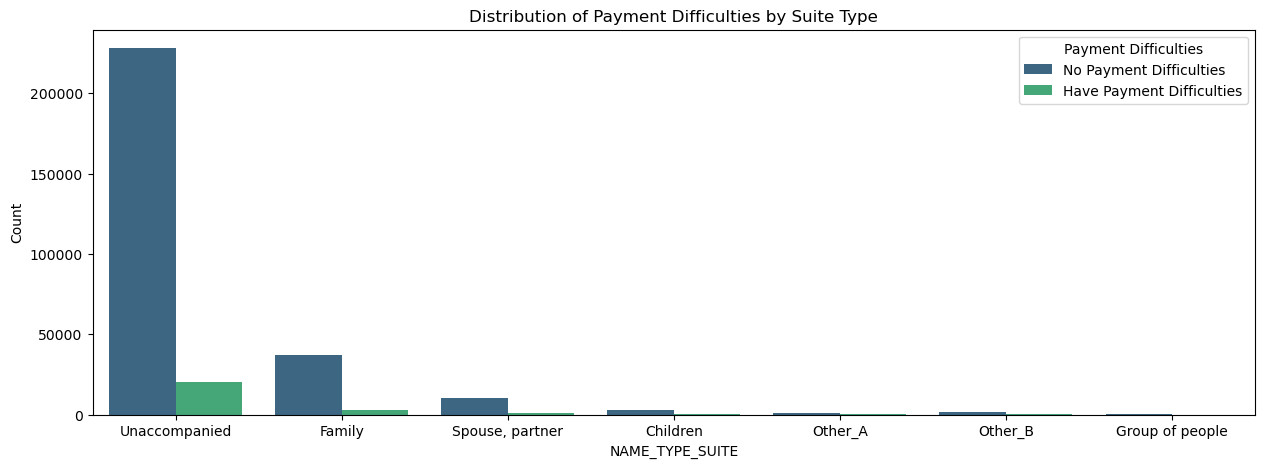

In [23]:
plt.figure(figsize=(15, 5))
sns.countplot(x='NAME_TYPE_SUITE', hue='TARGET', palette='viridis', data=df)
plt.title("Distribution of Payment Difficulties by Suite Type")
plt.xlabel("NAME_TYPE_SUITE")
plt.ylabel("Count")
plt.legend(title="Payment Difficulties", labels=["No Payment Difficulties", "Have Payment Difficulties"])
plt.show()


terlihat bahwa client yang paling banyak meminjam tidak didampingi oleh siapapun baik dari keluarga, dan lainnya

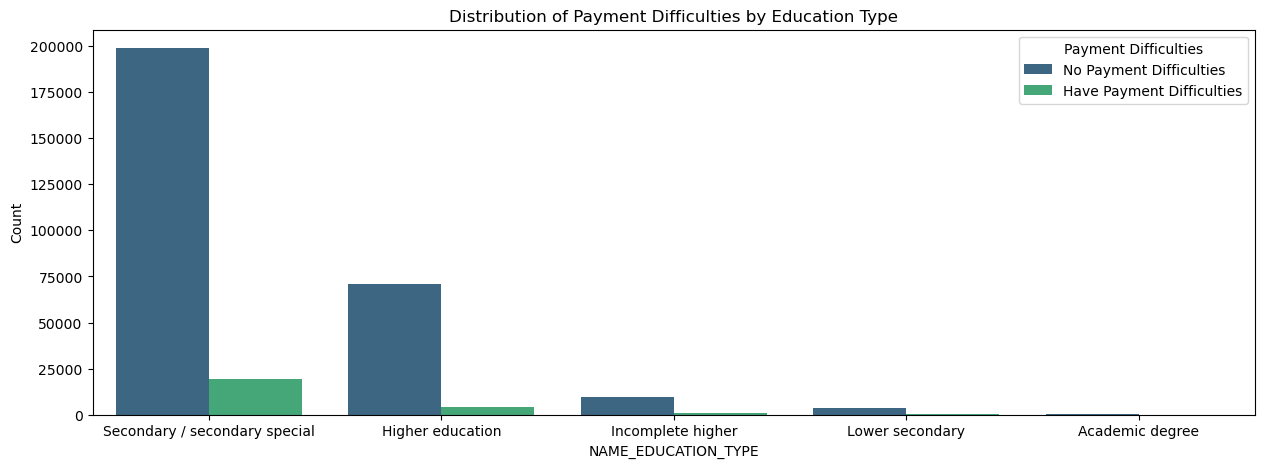

In [24]:
plt.figure(figsize=(15, 5))
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', palette='viridis', data=df)
plt.title("Distribution of Payment Difficulties by Education Type")
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("Count")
plt.legend(title="Payment Difficulties", labels=["No Payment Difficulties", "Have Payment Difficulties"])
plt.show()


terlihat bahwa client yang paling banyak melakukan peminjaman berasal dari client yang memiliki tingkat pendidikan secondary/secondary special.

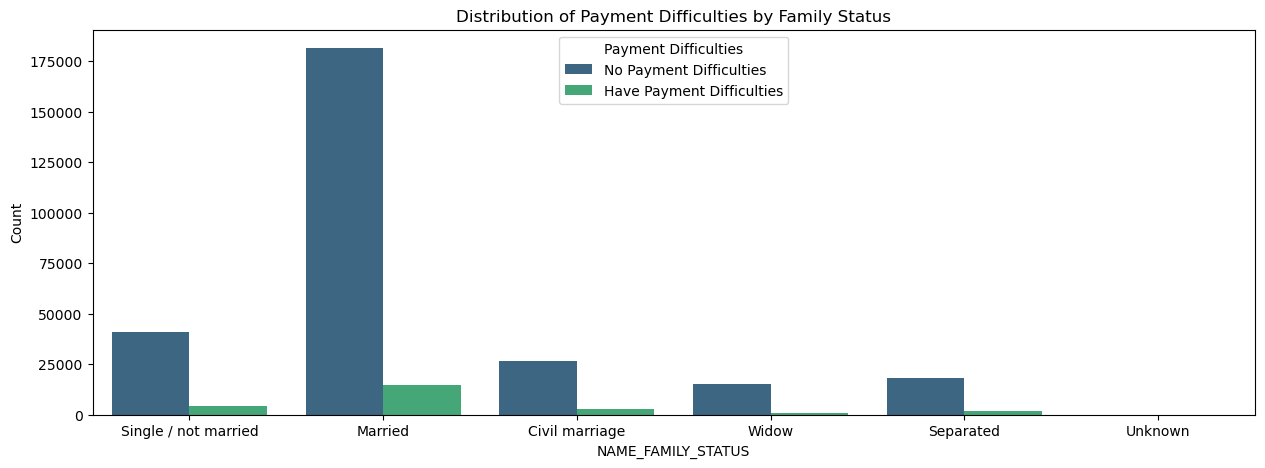

In [25]:
plt.figure(figsize=(15, 5))
sns.countplot(x='NAME_FAMILY_STATUS', hue='TARGET', palette='viridis', data=df)
plt.title("Distribution of Payment Difficulties by Family Status")
plt.xlabel("NAME_FAMILY_STATUS")
plt.ylabel("Count")
plt.legend(title="Payment Difficulties", labels=["No Payment Difficulties", "Have Payment Difficulties"])
plt.show()


terlihat bahwa client yang paling banyak meminjam merupakan client yang sudah menikah

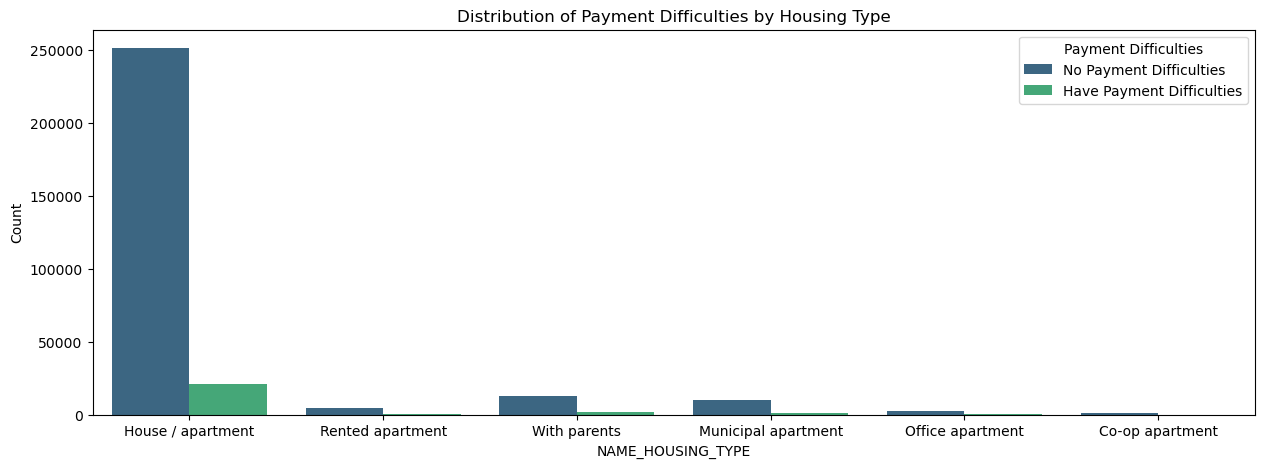

In [26]:
plt.figure(figsize=(15, 5))
sns.countplot(x='NAME_HOUSING_TYPE', hue='TARGET', palette='viridis', data=df)
plt.title("Distribution of Payment Difficulties by Housing Type")
plt.xlabel("NAME_HOUSING_TYPE")
plt.ylabel("Count")
plt.legend(title="Payment Difficulties", labels=["No Payment Difficulties", "Have Payment Difficulties"])
plt.show()


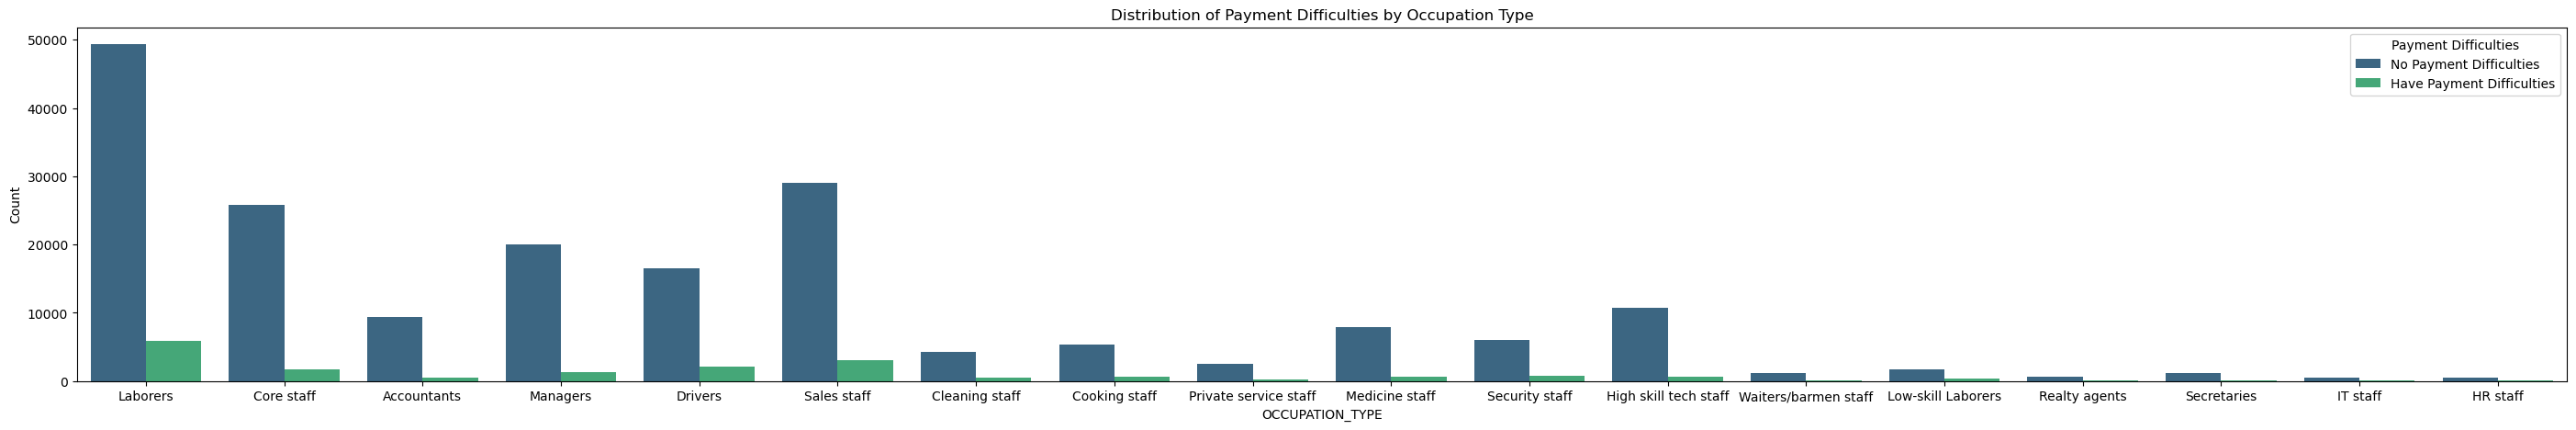

In [27]:
plt.figure(figsize=(35, 5))
sns.countplot(x='OCCUPATION_TYPE', hue='TARGET', palette='viridis', data=df)
plt.title("Distribution of Payment Difficulties by Occupation Type")
plt.xlabel("OCCUPATION_TYPE")
plt.ylabel("Count")
plt.legend(title="Payment Difficulties", labels=["No Payment Difficulties", "Have Payment Difficulties"])
plt.show()


terlihat bahwa yang paling banyak melakukan pinjaman adalah client yang memiliki pekerjaan sebagai buruh.

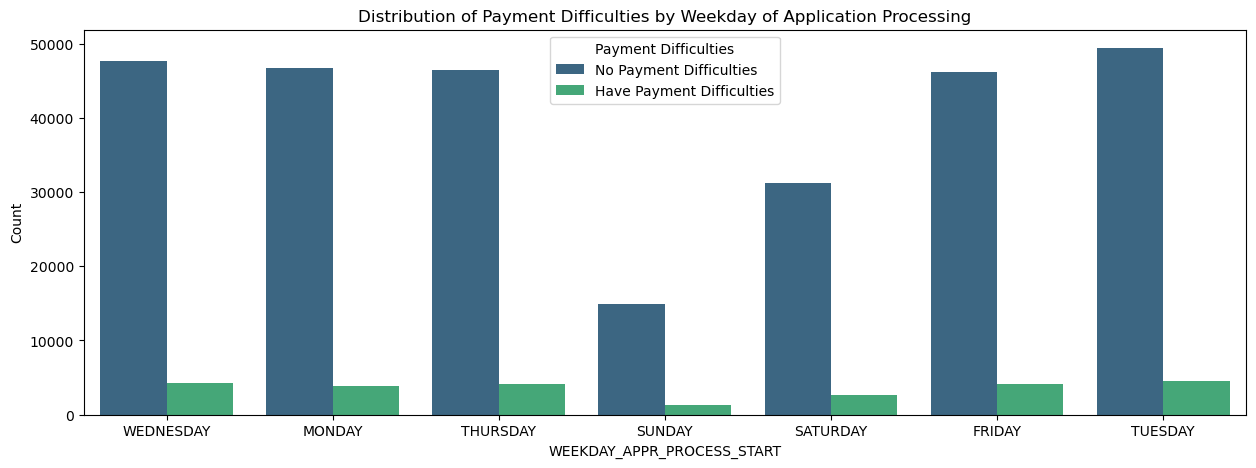

In [28]:
plt.figure(figsize=(15, 5))
sns.countplot(x='WEEKDAY_APPR_PROCESS_START', hue='TARGET', palette='viridis', data=df)
plt.title("Distribution of Payment Difficulties by Weekday of Application Processing")
plt.xlabel("WEEKDAY_APPR_PROCESS_START")
plt.ylabel("Count")
plt.legend(title="Payment Difficulties", labels=["No Payment Difficulties", "Have Payment Difficulties"])
plt.show()


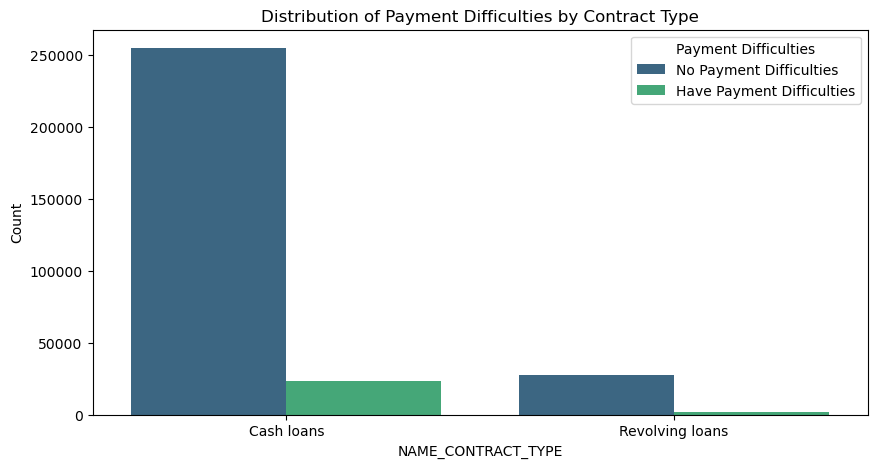

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', palette='viridis', data=df)
plt.title("Distribution of Payment Difficulties by Contract Type")
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("Count")
plt.legend(title="Payment Difficulties", labels=["No Payment Difficulties", "Have Payment Difficulties"])
plt.show()


In [30]:
import pandas as pd

# Group the data by 'ORGANIZATION_TYPE' and 'TARGET' and calculate the counts
grouped_data = df.groupby(['ORGANIZATION_TYPE', 'TARGET']).size().reset_index(name='Count')

# Sort the data by 'TARGET' (1: Have payment difficulties, 0: No payment difficulties) and 'Count' in descending order
sorted_data = grouped_data.sort_values(by=['TARGET', 'Count'], ascending=[True, False])

# Create a table from the sorted data
table = pd.pivot_table(sorted_data, values='Count', index='ORGANIZATION_TYPE', columns='TARGET', fill_value=0)

# Display the sorted table
sorted_table = table.sort_values(by=[1, 0], ascending=[False, False])
print(sorted_table)


TARGET                      0     1
ORGANIZATION_TYPE                  
Business Entity Type 3  61669  6323
Self-employed           34504  3908
XNA                     52384  2990
Other                   15408  1275
Business Entity Type 2   9653   900
Construction             5936   785
Trade: type 7            7091   740
Medicine                10456   737
Government               9678   726
School                   8367   526
Transport: type 4        4897   501
Business Entity Type 1   5497   487
Kindergarten             6396   484
Trade: type 3            3131   361
Industry: type 3         2930   348
Security                 2923   324
Agriculture              2197   257
Housing                  2723   235
Industry: type 11        2470   234
Industry: type 9         3143   225
Restaurant               1599   212
Transport: type 3        1000   187
Postal                   1975   182
Transport: type 2        2032   172
Military                 2499   135
Trade: type 2            176

In [31]:
import pandas as pd

# Group the data by 'ORGANIZATION_TYPE' and 'TARGET' and calculate the counts
grouped_data = df.groupby(['OCCUPATION_TYPE', 'TARGET']).size().reset_index(name='Count')

# Sort the data by 'TARGET' (1: Have payment difficulties, 0: No payment difficulties) and 'Count' in descending order
sorted_data = grouped_data.sort_values(by=['TARGET', 'Count'], ascending=[True, False])

# Create a table from the sorted data
table = pd.pivot_table(sorted_data, values='Count', index='OCCUPATION_TYPE', columns='TARGET', fill_value=0)

# Display the sorted table
sorted_table = table.sort_values(by=[1, 0], ascending=[False, False])
print(sorted_table)


TARGET                     0     1
OCCUPATION_TYPE                   
Laborers               49348  5838
Sales staff            29010  3092
Drivers                16496  2107
Core staff             25832  1738
Managers               20043  1328
Security staff          5999   722
High skill tech staff  10679   701
Cooking staff           5325   621
Medicine staff          7965   572
Accountants             9339   474
Cleaning staff          4206   447
Low-skill Laborers      1734   359
Private service staff   2477   175
Waiters/barmen staff    1196   152
Secretaries             1213    92
Realty agents            692    59
HR staff                 527    36
IT staff                 492    34


In [34]:

import pandas as pd

# Group the data by 'ORGANIZATION_TYPE' and 'TARGET' and calculate the counts
grouped_data = df.groupby(['NAME_INCOME_TYPE', 'TARGET']).size().reset_index(name='Count')

# Sort the data by 'TARGET' (1: Have payment difficulties, 0: No payment difficulties) and 'Count' in descending order
sorted_data = grouped_data.sort_values(by=['TARGET', 'Count'], ascending=[True, False])

# Create a table from the sorted data
table = pd.pivot_table(sorted_data, values='Count', index='NAME_INCOME_TYPE', columns='TARGET', fill_value=0)

# Display the sorted table
sorted_table = table.sort_values(by=[1, 0], ascending=[False, False])
print(sorted_table)

TARGET                     0      1
NAME_INCOME_TYPE                   
Working               143550  15224
Commercial associate   66257   5360
Pensioner              52380   2982
State servant          20454   1249
Unemployed                14      8
Maternity leave            3      2
Student                   18      0
Businessman               10      0


# Data Pre-processing

## Check Missing Value

In [38]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  

In [39]:
(df.isna().mean()*100).sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

terdapat 47 column yang memiliki jumlah missing data lebih dari 40% sehingga data tersebut akan di drop

## Drop missing value lebih dari 40%

In [40]:
missing_values = df.isna().mean()*100

In [41]:
columns_to_drop = missing_values[missing_values > 40.0].index
columns_to_drop

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [42]:
df.drop(columns_to_drop, axis=1, inplace=True)

In [43]:
(df.isna().mean()*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

### input missing value

In [44]:
category = df.select_dtypes(include=['object']).columns.tolist()
integer = df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in category):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].median())

In [45]:
(df.isna().mean()*100).sort_values(ascending=False).head(60)

SK_ID_CURR                     0.0
REG_CITY_NOT_WORK_CITY         0.0
FLAG_DOCUMENT_8                0.0
FLAG_DOCUMENT_7                0.0
FLAG_DOCUMENT_6                0.0
FLAG_DOCUMENT_5                0.0
FLAG_DOCUMENT_4                0.0
FLAG_DOCUMENT_3                0.0
FLAG_DOCUMENT_2                0.0
DAYS_LAST_PHONE_CHANGE         0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
OBS_60_CNT_SOCIAL_CIRCLE       0.0
DEF_30_CNT_SOCIAL_CIRCLE       0.0
OBS_30_CNT_SOCIAL_CIRCLE       0.0
EXT_SOURCE_3                   0.0
EXT_SOURCE_2                   0.0
ORGANIZATION_TYPE              0.0
FLAG_DOCUMENT_9                0.0
FLAG_DOCUMENT_10               0.0
FLAG_DOCUMENT_11               0.0
FLAG_DOCUMENT_20               0.0
AMT_REQ_CREDIT_BUREAU_QRT      0.0
AMT_REQ_CREDIT_BUREAU_MON      0.0
AMT_REQ_CREDIT_BUREAU_WEEK     0.0
AMT_REQ_CREDIT_BUREAU_DAY      0.0
AMT_REQ_CREDIT_BUREAU_HOUR     0.0
FLAG_DOCUMENT_21               0.0
FLAG_DOCUMENT_19               0.0
FLAG_DOCUMENT_12    

## Cek Duplicate

In [46]:
df.duplicated().sum()

0

dataset tidak memiliki duplikat

In [47]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

## Mengganti Value Negatif

In [48]:
import pandas as pd

numeric_columns = df.select_dtypes(include=['int', 'float']).columns

any_negative_values = (df[numeric_columns] < 0).any()

columns_with_negative_values = numeric_columns[any_negative_values]
print("Columns with negative values:")
print(columns_with_negative_values)


Columns with negative values:
Index(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')


In [49]:
df[numeric_columns] = df[numeric_columns].abs()


column yang memiliki value negatif adalah DAYS_BIRTH, DAYS_EMPLOYER, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE

In [50]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

## label encoding

In [51]:
from sklearn.preprocessing import LabelEncoder
df[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = df[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

In [52]:
df.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100003       0                   0            0             0   
2      100004       0                   1            1             1   
3      100006       0                   0            0             0   
4      100007       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         351000.0                6                 7                    4   
1        1129500.0                1                 4                    1   
2         135000.0                6                 7                    4   
3         297000.0                6                 7                    4   
4         513000.0                6                 7                    4   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0                   3                  1                    0.018801   
1                   1                  1                    0.003541   
2                   3                  1                    0.010032   
3                   0                  1                    0.008019   
4                   3                  1                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0        9461            637             3648.0             2120           1   
1       16765           1188             1186.0              291           1   
2       19046            225             4260.0             2531           1   
3       19005           3039             9833.0             2437           1   
4       19932           3038             4311.0             3458           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                8              1.0                     2   
1                3              2.0                     1   
2                8              1.0                     2   
3                8              2.0                     2   
4                3              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           6   
1                            1                           1   
2                            2                           1   
3                            2                           6   
4                            2                           4   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                 

## Drop column yang tidak perlu

In [53]:
df.drop(['SK_ID_CURR'], inplace=True, axis=1)

In [54]:
df.head()

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   0            1             0                1   
1       0                   0            0             0                0   
2       0                   1            1             1                1   
3       0                   0            0             0                1   
4       0                   0            1             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                6                 7                    4                   3   
1                1                 4                    1                   1   
2                6                 7                    4                   3   
3                6                 7                    4                   0   
4                6                 7                    4                   3   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  1                    0.018801        9461            637   
1                  1                    0.003541       16765           1188   
2                  1                    0.010032       19046            225   
3                  1                    0.008019       19005           3039   
4                  1                    0.028663       19932           3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0             3648.0             2120           1               1   
1             1186.0              291           1               1   
2             4260.0             2531           1               1   
3             9833.0             2437           1               1   
4             4311.0             3458           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
0                0                 1           1           0                8   
1                0                 1           1           0                3   
2                1                 1           1           0                8   
3                0                 1           0           0                8   
4                0                 1           0           0                3   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           6                       10   
1                           1                       11   
2                           1                        9   
3                           6                       17   
4                           4                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_L

## Imbalance

In [55]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [56]:
total_records = df['TARGET'].count()
percentage_counts = df['TARGET'].value_counts() / total_records * 100
print(percentage_counts)


0    91.927118
1     8.072882
Name: TARGET, dtype: float64


 data TARGET memiliki imbalance sehingga nantinya akan dilakukan resampling

### Handling Imbalance

In [57]:
df['TARGET'] = df['TARGET'].astype(int)

In [58]:
print(df['TARGET'].dtypes)


int32


In [59]:
from sklearn.utils import resample 
df_majority = df[(df['TARGET']==0)] 
df_minority = df[(df['TARGET']==1)] 

df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= 282686, 
                                 random_state=42)  

df_upsampled = pd.concat([df_minority_upsampled, df_majority])

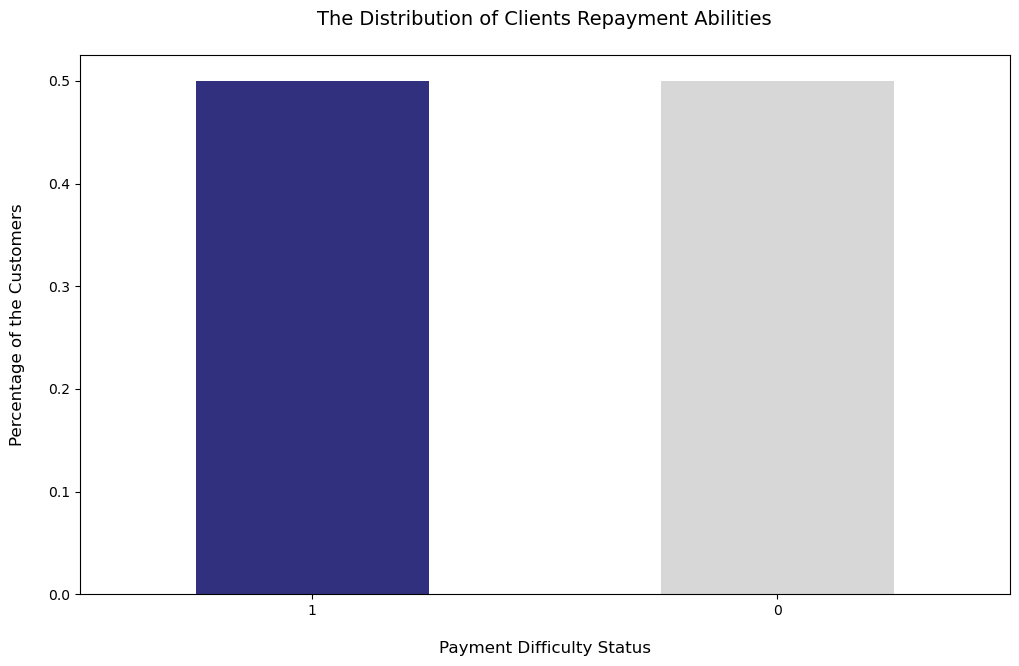

In [60]:
fig = plt.figure(figsize = (12,7))
df_upsampled['TARGET'].value_counts(normalize=True).plot(kind='bar', color= ['midnightblue','lightgrey'], alpha = 0.9, rot=0)
plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=14)
plt.ylabel('Percentage of the Customers\n', fontsize=12)
plt.xlabel('\nPayment Difficulty Status', fontsize=12)
plt.show()

## Memisahkan Feature dan Target

In [61]:
x = df_upsampled.drop(['TARGET'], axis=1)
y = df_upsampled['TARGET']

In [62]:
df_upsampled.head(5)

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
292662       1                   0            0             1   
194394       1                   0            0             0   
11104        1                   0            0             0   
66953        1                   0            1             1   
266717       1                   0            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
292662                1             0          108000.0    213322.5   
194394                0             1           99000.0    450000.0   
11104                 0             1          270000.0   1206954.0   
66953                 1             2          270000.0    521280.0   
266717                1             0          225000.0    454500.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
292662      15651.0         162000.0                6                 7   
194394      35685.0         450000.0                6                 7   
11104       31968.0         945000.0                6                 1   
66953       31630.5         450000.0                6                 7   
266717      16825.5         454500.0                6                 7   

        NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
292662                    4                   0                  2   
194394                    4                   1                  5   
11104                     4                   3                  5   
66953                     4                   1                  1   
266717                    1                   0                  4   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
292662                    0.020713       17027           1605   
194394                    0.014520       11818            529   
11104                     0.046220        9418            981   
66953                     0.025164       12239           4214   
266717                    0.014520       11081            591   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
292662             7519.0              575           1               1   
194394             5330.0             3460           1               1   
11104              6695.0             2092           1               1   
66953              5326.0             4459           1               1   
266717             3450.0             1009           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
292662                0                 1           0           0   
194394                0                 1           0           0   
11104                 0                 1           0           0   
66953                 0                 1           0           0   
266717                0                 1           0           0   

        OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
292662                4              2.0                     3   
194394                8              3.0                     2   
11104                11              2.0                     1   
66953                10              4.0                     2   
266717               14              2.0                     2   

        REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
292662                            2                           6   
194394                            2                           4   
11104                             1                           6   
66953                             2                           5   
266717                            2                           0   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
292662                        8                           0   
194394                       10                           0   
11104                        16                           0   
66953          

## Split Data

In [63]:
fitur = df_upsampled.copy()
X = fitur.drop('TARGET', axis=1) 
y = fitur['TARGET']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(452297, 71) (113075, 71)


In [65]:
# Cek jumlah data training per class
print(pd.Series(y_train).value_counts())

0    226185
1    226112
Name: TARGET, dtype: int64


In [66]:
#Cek jumlah data testing per class
print(pd.Series(y_test).value_counts())

1    56574
0    56501
Name: TARGET, dtype: int64


In [67]:
len(X_train) #jumlah toal data training

452297

In [68]:
len(X_test) #jumlah data testing

113075

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Fungsi untuk menampilkan hasil evaluasi model pada data train dan testing
    
    Parameters:
    model (sklearn estimator): model yang akan dievaluasi
    X_train (numpy array): feature dari data train
    y_train (numpy array): target dari data train
    X_test (numpy array): feature dari data test
    y_test (numpy array): target dari data test
    
    Returns:
    None
    """
    
    # fit model pada data train
    model.fit(X_train, y_train)
    
    # membuat prediksi pada data train dan test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # menghitung dan menampilkan hasil evaluasi pada data train
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_roc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    print("Training Accuracy : {:.2f}%".format(train_acc*100))
    print("Training Precision: {:.2f}%".format(train_prec*100))
    print("Training Recall   : {:.2f}%".format(train_recall*100))
    print("Training ROC AUC  : {:.2f}%".format(train_roc*100))
    
    # menghitung dan menampilkan hasil evaluasi pada data test
    test_acc = accuracy_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print("\nTesting Accuracy : {:.2f}%".format(test_acc*100))
    print("Testing Precision: {:.2f}%".format(test_prec*100))
    print("Testing Recall   : {:.2f}%".format(test_recall*100))
    print("Testing ROC AUC  : {:.2f}%".format(test_roc*100))
    



# Modelling

## Decision Tree

In [70]:
# inisiasi model
from sklearn.tree import DecisionTreeClassifier
# inisiasi model
model_dt = DecisionTreeClassifier()

# evaluasi model
evaluate_model(model_dt, X_train, y_train, X_test, y_test)


Training Accuracy : 100.00%
Training Precision: 100.00%
Training Recall   : 100.00%
Training ROC AUC  : 100.00%

Testing Accuracy : 95.14%
Testing Precision: 91.15%
Testing Recall   : 99.99%
Testing ROC AUC  : 95.13%


In [71]:
# model = DecisionTreeClassifier()
from sklearn.model_selection import cross_validate
score = cross_validate(model_dt, X, y, cv=5, scoring='roc_auc', return_train_score=True)
print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9524437058064985


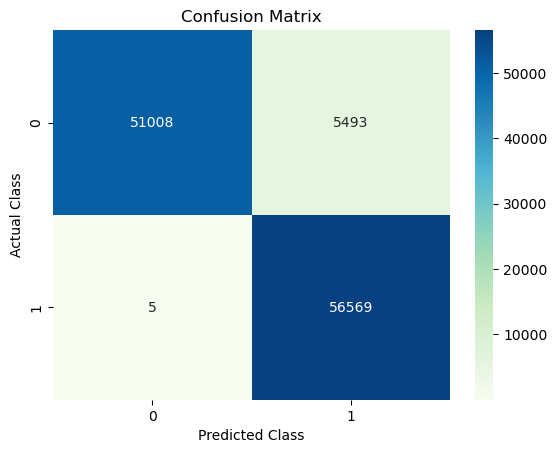

In [72]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model_dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.savefig("confusion matrix")

## Logistic Regression

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    # 
    score = cross_validate(RandomForestClassifier(), X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [74]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
model_lr = LogisticRegression(max_iter=1000)


# Evaluate the model
evaluate_model(model_lr, X_train, y_train, X_test, y_test)


Training Accuracy : 57.94%
Training Precision: 58.50%
Training Recall   : 54.60%
Training ROC AUC  : 60.72%

Testing Accuracy : 57.77%
Testing Precision: 58.33%
Testing Recall   : 54.57%
Testing ROC AUC  : 60.53%


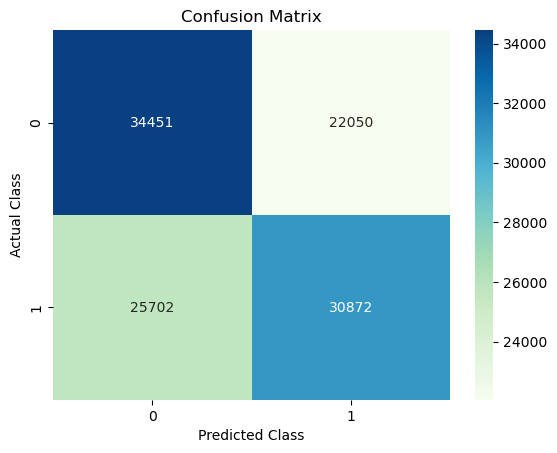

In [75]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model_lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.savefig("confusion matrix")

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize logistic regression model
model_lr = LogisticRegression(max_iter=1000)

# Perform cross-validation
cv_scores = cross_val_score(model_lr, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())


Cross-validation scores: [0.5790493  0.57804112 0.57855917 0.58023949 0.57972655]
Mean accuracy: 0.5791231280569773


## Xgboost

In [77]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
# evaluasi model
evaluate_model(xgb, X_train, y_train, X_test, y_test)

Training Accuracy : 76.07%
Training Precision: 75.37%
Training Recall   : 77.45%
Training ROC AUC  : 84.20%

Testing Accuracy : 74.85%
Testing Precision: 74.05%
Testing Recall   : 76.56%
Testing ROC AUC  : 82.78%


In [78]:
score = cross_validate(xgb, X, y, cv=5, scoring='roc_auc', return_train_score=True)
print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

roc_auc (crossval train): 0.8428808610108316
roc_auc (crossval test): 0.8281440217571913


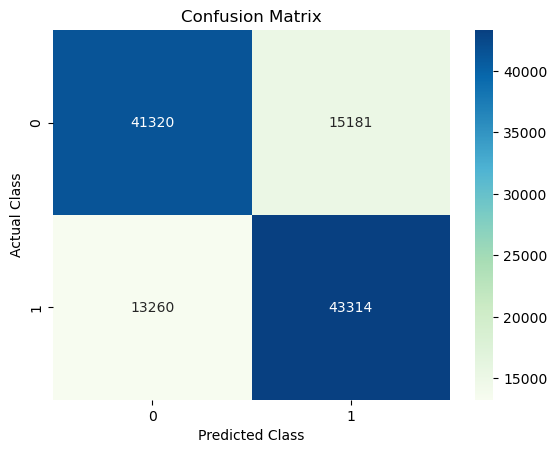

In [79]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = xgb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.savefig("confusion matrix")

## Ada Boost Clasifier

In [80]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier()
evaluate_model(ada_clf, X_train, y_train, X_test, y_test)

Training Accuracy : 68.04%
Training Precision: 68.31%
Training Recall   : 67.30%
Training ROC AUC  : 74.35%

Testing Accuracy : 67.94%
Testing Precision: 68.22%
Testing Recall   : 67.27%
Testing ROC AUC  : 74.32%


In [81]:
score = cross_validate(ada_clf, X, y, cv=5, scoring='roc_auc', return_train_score=True)
print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

roc_auc (crossval train): 0.7434405692966282
roc_auc (crossval test): 0.7428043772902889


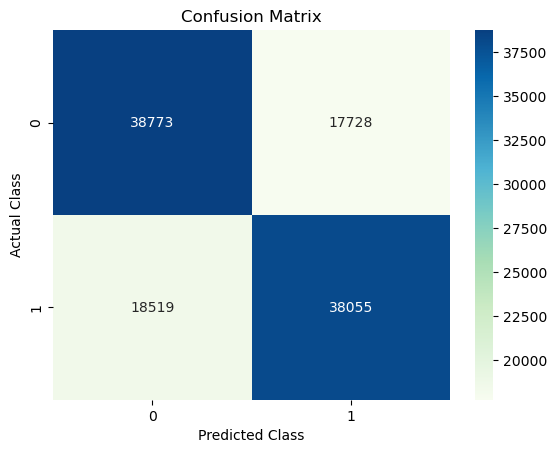

In [82]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = ada_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.savefig("confusion matrix")

berdasarkan berbagai model yang digunakan, Decision Tree Classifier memberikan hasil yang lebih baik dibandingkan model lainnya dengan :
Training Accuracy : 100.00%
Training Precision: 100.00%
Training Recall   : 100.00%
Training ROC AUC  : 100.00%

Testing Accuracy : 95.23%
Testing Precision: 91.30%
Testing Recall   : 99.99%
Testing ROC AUC  : 95.22%

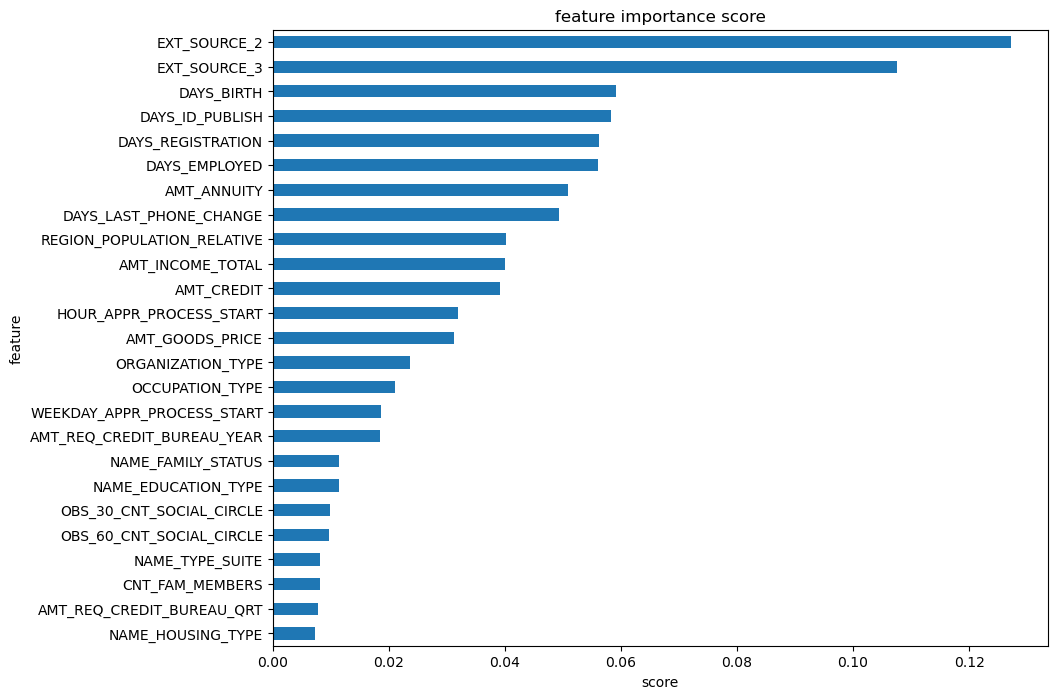

In [83]:
feat_importances = pd.Series(model_dt.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')
plt.savefig("Feature Importance")

berdasarkan feature importance terlihat bahwa feature yang paling penting terhadap yang menentukan client kesulitan membayar atau tidak adalah feature EXT_Source_2 dan EXT_Source_3 yang menandakan bahwa terdapat faktor external yang belum terindikasi dan mungkin memiliki feature yang berhubungan dengan credit score.

Rekomendasi: Perlu adanya explorasi lebih lanjut yang dapat menambahkan insight dan feature baru score sehingga dapat meningkatkan akurasi dan feature yang lebih tepat yang mempengaruhi credit score.